<a href="https://colab.research.google.com/github/chr1shr/am205_g_activities/blob/master/dmd/dmd_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Activity: Dynamic Mode Decomposition (DMD)

## Group members:

Name 1, Name 2 (, Name 3) 

## References

J. Nathan Kutz, Steven L. Brunton, Bingni W. Brunton, and Joshua L. Proctor. _Dynamic mode decomposition: data-driven modeling of complex systems_. Society for Industrial and Applied Mathematics, 2016.

Steven L. Brunton, “Data-Driven Dynamical Systems with Machine Learning.” YouTube. https://www.youtube.com/playlist?list=PLMrJAkhIeNNR6DzT17-MM1GHLkuYVjhyt. 

## The DMD algorithm

1. Take the singular value decomposition (SVD) of $\mathbf{X}$:
$$\mathbf{X} \approx \mathbf{U}\mathbf{\Sigma}\mathbf{V}^*$$
where $*$ is the conjugate transpose, _i.e._ $\mathbf{V}^*\mathbf{V}=\mathbf{I}$.

2. Compute $\tilde{\mathbf{A}}$, the $r\times r$ projection of the full matrix $\mathbf{A}$ onto the proper orthogonal decomposition (POD) modes:
$$\tilde{\mathbf{A}}=\mathbf{U}^*\mathbf{A}\mathbf{U}=\mathbf{U}^*\mathbf{X}'\mathbf{V}\mathbf{\Sigma}^{-1}$$

3. Compute the eigendecomposition of $\tilde{\mathbf{A}}$:
$$\tilde{\mathbf{A}}\mathbf{W}=\mathbf{W}\mathbf{\Lambda}$$

4. Reconstruct the eigenvector $\mathbf{\Phi}$, _i.e._ modes (spatial-temporal coherent mode shapes):
$$\mathbf{\Phi}=\mathbf{X}'\mathbf{V}\mathbf{\Sigma}^{-1}\mathbf{W}$$
where we may reconstruct the eigendecomposition of $\mathbf{A}$ from $\mathbf{\Lambda}$ and $\mathbf{\Phi}$.

## Question 1: Write your own DMD function (in-workshop)

### Part I: Discussion

We are surrounded by dynamical systems, some of which we take for granted and have not think about them in the context of dynamical systems. Please discuss with your group and list three examples of dynamical systems. In each example, please also describe (1) the physical meaning/implication of the state (vector) (2) and the dynamics (vector field).

Please do not list examples from the workshop slides.

Example 1:

Example 2:

Example 3:

### Part II: coding

Follow the 4 steps in the DMD algorithm and code up a function that takes in three inputs: two sets of data (x1 and x2) and the rank of the reduced SVD approximation to x (r). The function should return r number of eigenvalues and their corresponding DMD modes (_i.e._ eigenvectors of $\mathbf{A}$).

Note: r is a parameter can be tuned. One way to get a good estimate of r is to plot the singular values of x and count how many are dominant.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

In [ ]:
# The core DMD function
def dmd_func(x1,x2,r):
    
    # Step 1: Compute SVD of x (uu,ss,vv)
    ### WRITE CODE HERE ###
    
    # Truncate at r-th mode
    u=uu[:,:r]
    s=np.diag(ss)[:r,:r]
    v=vv.conj().T[:,:r]
    
    # Step 2: Construct A_tilde
    ### WRITE CODE HERE ###
    
    # Step 3: Eigendecomposition of A_tilde (eigs,w)
    ### WRITE CODE HERE ###
    
    # Step 4: Reconstruct DMD modes (phi)
    ### WRITE CODE HERE ###
    
    return eigs,phi

### A toy example (p.p 11 from Kutz et. al.'s book)

We combine two signals together:
$$f(x,t)=f_1(x,t)+f_2(x,t)$$
where
$$f_1(x,t)=\text{sech}(x+3)\exp(i2.3t)$$
$$f_2(x,t)=2\text{sech}(x)\tanh(x)\exp(i2.8t)$$

In [ ]:
# Define time and space discretizations
x=np.linspace(-10,10,400)
t=np.linspace(0,4*np.pi,200)
dt=t[1]-t[0]
xgrid,tgrid=np.meshgrid(x,t)

# Create two spatiotemporal patterns
f1=np.multiply(1./np.cosh(xgrid+3),np.exp(1j*2.3*tgrid))
f2=np.multiply(np.multiply(1./np.cosh(xgrid),1*np.tanh(xgrid)),2*np.exp(1j*2.8*tgrid))

# Combine signals and make data matrix
data=(f1+f2).T

# Create DMD data matrices
x1=data[:,:-1]
x2=data[:,1:]

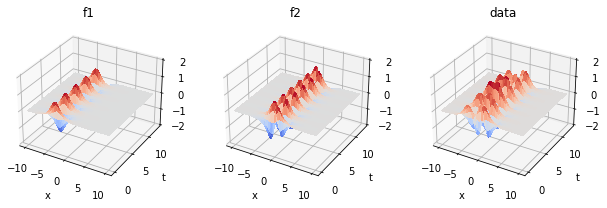

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10.5,3),subplot_kw={"projection": "3d"})

ax1.plot_surface(xgrid,tgrid,np.real(f1),cmap=cm.coolwarm,linewidth=0,antialiased=False)
ax1.set_xlabel("x")
ax1.set_ylabel("t")
ax1.set_title("f1")
ax1.set_zlim(-2,2)

ax2.plot_surface(xgrid,tgrid,np.real(f2),cmap=cm.coolwarm,linewidth=0,antialiased=False)
ax2.set_xlabel("x")
ax2.set_ylabel("t")
ax2.set_title("f2")
ax2.set_zlim(-2,2)

ax3.plot_surface(xgrid,tgrid,np.real(data.T),cmap=cm.coolwarm,linewidth=0,antialiased=False)
ax3.set_xlabel("x")
ax3.set_ylabel("t")
ax3.set_title("data")
ax3.set_zlim(-2,2)

plt.show()

One way to determine the number of r is to plot the singular values.

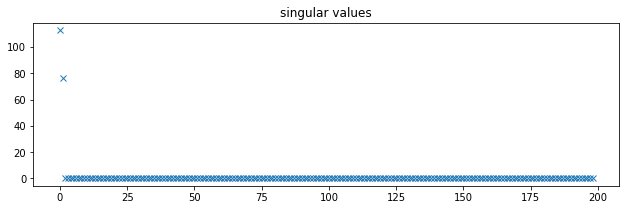

In [ ]:
uu,ss,vv=np.linalg.svd(x1,full_matrices=False)

plt.figure(figsize=(10.5,3))
plt.plot(np.arange(0,ss.shape[0],1),ss,'x')
plt.title("singular values")
plt.show()

In [ ]:
r=2
eigs,phi=dmd_func(x1,x2,r)

In [ ]:
# DMD spectra
omega=np.log(eigs)/dt
omega

array([-4.46576509e-15+2.8j, -1.49195797e-14+2.3j])

Notice how DMD exactly returns the frequencies of oscillation with their imaginary components!

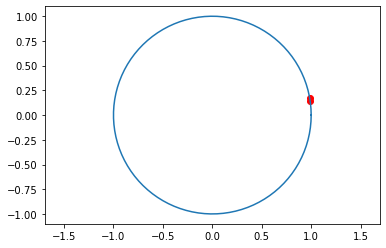

In [ ]:
theta=np.linspace(0,1,100)*2*np.pi
plt.plot(np.cos(theta),np.sin(theta))
plt.scatter(np.real(eigs),np.imag(eigs),color='red')
plt.xlim([-2.0,2.0])
plt.ylim([-2.0,2.0])
plt.axis("equal")
plt.show()

In [ ]:
# Compute DMD mode amplitude b, which gives the initial conditions
b=np.dot(np.linalg.pinv(phi),x1[:,0])
time_dynamics=np.zeros([r,len(t)], dtype='complex')
for i,tt in enumerate(t):
    time_dynamics[:,i]=np.multiply(np.power(eigs,tt/dt),b)

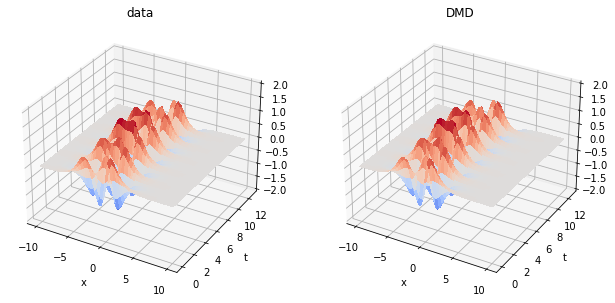

In [ ]:
xdmd=np.dot(phi,time_dynamics)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10.5,6),subplot_kw={"projection": "3d"})

ax1.plot_surface(xgrid,tgrid,np.real(data.T),cmap=cm.coolwarm,linewidth=0,antialiased=False)
ax1.set_xlabel("x")
ax1.set_ylabel("t")
ax1.set_title("data")
ax1.set_zlim(-2,2)

ax2.plot_surface(xgrid,tgrid,np.real(xdmd.T),cmap=cm.coolwarm,linewidth=0,antialiased=False)
ax2.set_xlabel("x")
ax2.set_ylabel("t")
ax2.set_title("DMD")
ax2.set_zlim(-2,2)

plt.show()

In [ ]:
# Compute L1 error
np.real(np.average(np.abs(data-xdmd)))

1.7875631870309307e-14

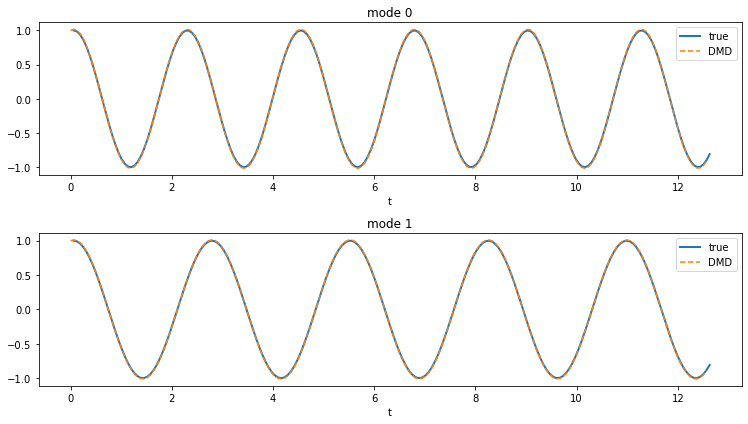

In [ ]:
fig,(ax,ax2)=plt.subplots(2,1,figsize=(10.5,6))
ax.plot(t+dt,np.real(np.exp(1j*2.8*t)),linewidth=2.0,label="true")
ax.plot(t,np.real(time_dynamics[0,:])/np.real(b[0]),'--',label="DMD")
ax.set_title("mode 0")
ax.set_xlabel("t")
ax.legend(loc='best')

ax2.plot(t+dt,np.real(np.exp(1j*2.3*t)),linewidth=2.0,label="true")
ax2.plot(t,np.real(time_dynamics[1,:])/np.real(b[1]),'--',label="DMD")
ax2.set_title("mode 1")
ax2.set_xlabel("t")
ax2.legend(loc='best')

plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
plt.show()

## Question 2: Apply DMD on vortex shedding

The simulation data is generated by a fluid simulation based on the lattice Boltzmann method. The raw data only contains density $\rho$ and velocity $\vec{u}$ in x and y directions.

We are interested in the vorticity field of the vortex shedding because this field gives us more information about the vortex motion. Therefore, we need to compute the vorticity field from the raw data, and then do DMD. The vorticity is defined as
$$\vec{w}=\nabla\times\vec{u}$$
which is effectively a field in 3D. Since our simulation data is only 2D, we can visualize the vorticity field with the following equation
$$\vec{w}=\left(\frac{\partial \vec{u}_y}{\partial x}-\frac{\partial \vec{u}_x}{\partial y}\right)\hat{z}$$

Please download the data folder into the same directory as the Jupyter notebook!
https://drive.google.com/file/d/1Mi4cjJD-4X7q1ToP1klwFeQnFJ5lAYxB/view?usp=sharing
```
dmd/
│   README.md
│   dmd_assignment.ipynb    
└───vortex_street_a/
│   │   fr_0000.txt
│   │   fr_0001.txt
│   │   ...
│   └───fr_0100.txt
└───vortex_street_b/
└───vortex_street_c/
└───vortex_street_d/
```

### (a) Complete two functions to load and construct data matrices

In [ ]:
# Function to load up one .txt file
# Custom to the output files generated by the in-house lattice Boltzmann fluid solver
# Data saving format: index_i index_j density velocity_x velocity_y
def load_file(outdir,fr):
    filename="fr_%04d"%fr
    filename="fr_%04d"%fr
    contents=np.loadtxt(outdir+filename+".txt")
    header=contents[0,:]
    nx=int(header[-2])
    ny=int(header[-1])
    i=contents[1:nx*ny+1,0]
    j=contents[1:nx*ny+1,1]
    rho=contents[1:nx*ny+1,2].reshape(ny,nx)
    ux=contents[1:nx*ny+1,3].reshape(ny,nx)
    uy=contents[1:nx*ny+1,4].reshape(ny,nx)
    # Compute speed (hint: think about magnitude)
    ### WRITE CODE HERE ###
    # Compute vorticity (hint: use np.gradient and specify which axis to compute along)
    ### WRITE CODE HERE ###
    
    return rho,ux,uy,speed,vort

In [ ]:
# Function to construct the data matrices
def construct_data_mat(outdir,fr_end,nx,ny):
    
    # Allocate the "big data" matrix, each column is the vectorized vorticity field
    vort_data=np.empty((nx*ny,fr_end+1))

    # Iterate through all data files to build the "big data" matrix
    for fr in range(fr_end+1):
        # Load in the physical fields at frame fr
        vort=load_file(outdir,fr)[4]
        # Convert the matrix into a column vector
        ### WRITE CODE HERE ###
        
    # Construct the two data matrices x1 and x2
    ### WRITE CODE HERE ###
    
    return x1,x2

### (b) Use DMD from Q1 to extract vortex shedding dynamic modes

In [ ]:
# Load output .txt directory
outdir="vortex_street_a/"
# Number of data files
fr_end=100
# Simulation domain size
nx,ny=300,100
# Rank of the reduced SVD approximation to x
r=20

In [ ]:
# Construct data matrices
x1,x2=construct_data_mat(outdir,fr_end,nx,ny)
# Do DMD to get r number of eigenvalues and modes
eigs,phi=dmd_func(x1,x2,r)

In [ ]:
# Sort the eigenvalues and modes
idx=eigs.argsort()[::-1]   
eigs=eigs[idx]
phi=phi[:,idx]

### (c) Visualize the dynamic modes and eigenvalues

In [ ]:
# Helper function to create output directories
def create_dir(outdir):
    output=os.path.join(outdir,"output")
    if not os.path.exists(output):
        os.makedirs(output)
    return output

In [ ]:
output=create_dir(outdir)

for mid in range(r):
    fig,(ax,ax2)=plt.subplots(1,2,figsize=(10.5,3),gridspec_kw={'width_ratios':[3,8]})

    ax.set_title('Eigenvalues')
    theta=np.linspace(0,1,100)*2*np.pi
    ax.plot(np.cos(theta),np.sin(theta),'--')
    ax.plot(np.real(eigs),np.imag(eigs),'o',markerfacecolor='none',color='red')
    ax.set_xlim([-1.0,1.0])
    ax.set_ylim([-1.0,1.0])
    ax.plot(np.real(eigs[mid]),np.imag(eigs[mid]),'o',markersize=10,color='red')
    ax.axis("equal")

    ax2.set_title('Mode %s' % str(mid))
    ax2.imshow(np.real(phi[:,mid].reshape(ny,nx)),cmap=cm.RdBu,vmin=-0.02,vmax=0.02)
    ax2.invert_yaxis()

    plt.tight_layout()
    # plt.show()
    plt.savefig(output+"/mode_%i.png" % (mid))
    plt.cla()
    plt.clf()
    plt.close()

Discussion:

### (d) Reconstruct the future vorticity field

Reconstruct the vorticity field of the next snapshot with the eigenvalues and eigenvectors from Part (c).

### (e) Rank the Reynolds number

Discussion: